------------------

# **Report on Concrete Compressive Strength Prediction**


<h1 style="font-family: 'poppins'; font-weight: bold; color: Blue;">Author: Muhammad Adil Naeem</h1>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-green?style=for-the-badge&logo=github)](https://github.com/muhammadadilnaeem) 

[![Twitter/X](https://img.shields.io/badge/Twitter-Profile-red?style=for-the-badge&logo=twitter)](https://twitter.com/adilnaeem0) 

[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/muhammad-adil-naeem-26878b2b9/)  


----------------------

## **1. Data Description**

This dataset is taken from [kaggle](https://www.kaggle.com/datasets/niteshyadav3103/concrete-compressive-strength).

The dataset contains 1030 entries with 9 columns. The columns represent different features related to the composition and age of concrete, along with its compressive strength. Below are the details of each column:

- **Cement**: Amount of cement in the mixture (in kg/m³)
- **Blast Furnace Slag**: Amount of blast furnace slag in the mixture (in kg/m³)
- **Fly Ash**: Amount of fly ash in the mixture (in kg/m³)
- **Water**: Amount of water in the mixture (in kg/m³)
- **Superplasticizer**: Amount of superplasticizer in the mixture (in kg/m³)
- **Coarse Aggregate**: Amount of coarse aggregate in the mixture (in kg/m³)
- **Fine Aggregate**: Amount of fine aggregate in the mixture (in kg/m³)
- **Age (day)**: Age of the concrete (in days)
- **Concrete Compressive Strength**: Concrete compressive strength (in MPa)

----

## **2. Main Objective**
- The main objective of this analysis is to predict the compressive strength of concrete based on its composition and age. 
- This can help in understanding the relationship between the different ingredients and the resulting strength, aiding in the design of concrete mixtures for specific strength requirements.

### **3. Exploratory Data Analysis**

#### **Importing Libraries**

In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_auc_score,roc_curve,ConfusionMatrixDisplay

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#### **Load the dataset**

In [4]:
data = pd.read_csv('..\data\Concrete Compressive Strength.csv')
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


#### **Shape of the dataset**

In [5]:
print(f"This dataset consist of {data.shape[0]} rows and {data.shape[1]} columns")

This dataset consist of 1030 rows and 9 columns


#### **Detailed Information of the dataset**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Cement                          1030 non-null   float64
 1   Blast Furnace Slag              1030 non-null   float64
 2   Fly Ash                         1030 non-null   float64
 3   Water                           1030 non-null   float64
 4   Superplasticizer                1030 non-null   float64
 5   Coarse Aggregate                1030 non-null   float64
 6   Fine Aggregate                  1030 non-null   float64
 7   Age (day)                       1030 non-null   int64  
 8   Concrete compressive strength   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


- The output of the data.info() function in Python, which provides a summary of the DataFrame object named 'pandas.core.frame.DataFrame'. This DataFrame appears to have 1030 entries, ranging from 0 to 1029, and 9 data columns.

- The data types for each column are also shown, with most columns having a float64 data type and one column having an int64 data type.

- The memory usage of this DataFrame is reported as 72.6 KB.

#### **Let's make a correlation matrix to see what features are correlated**

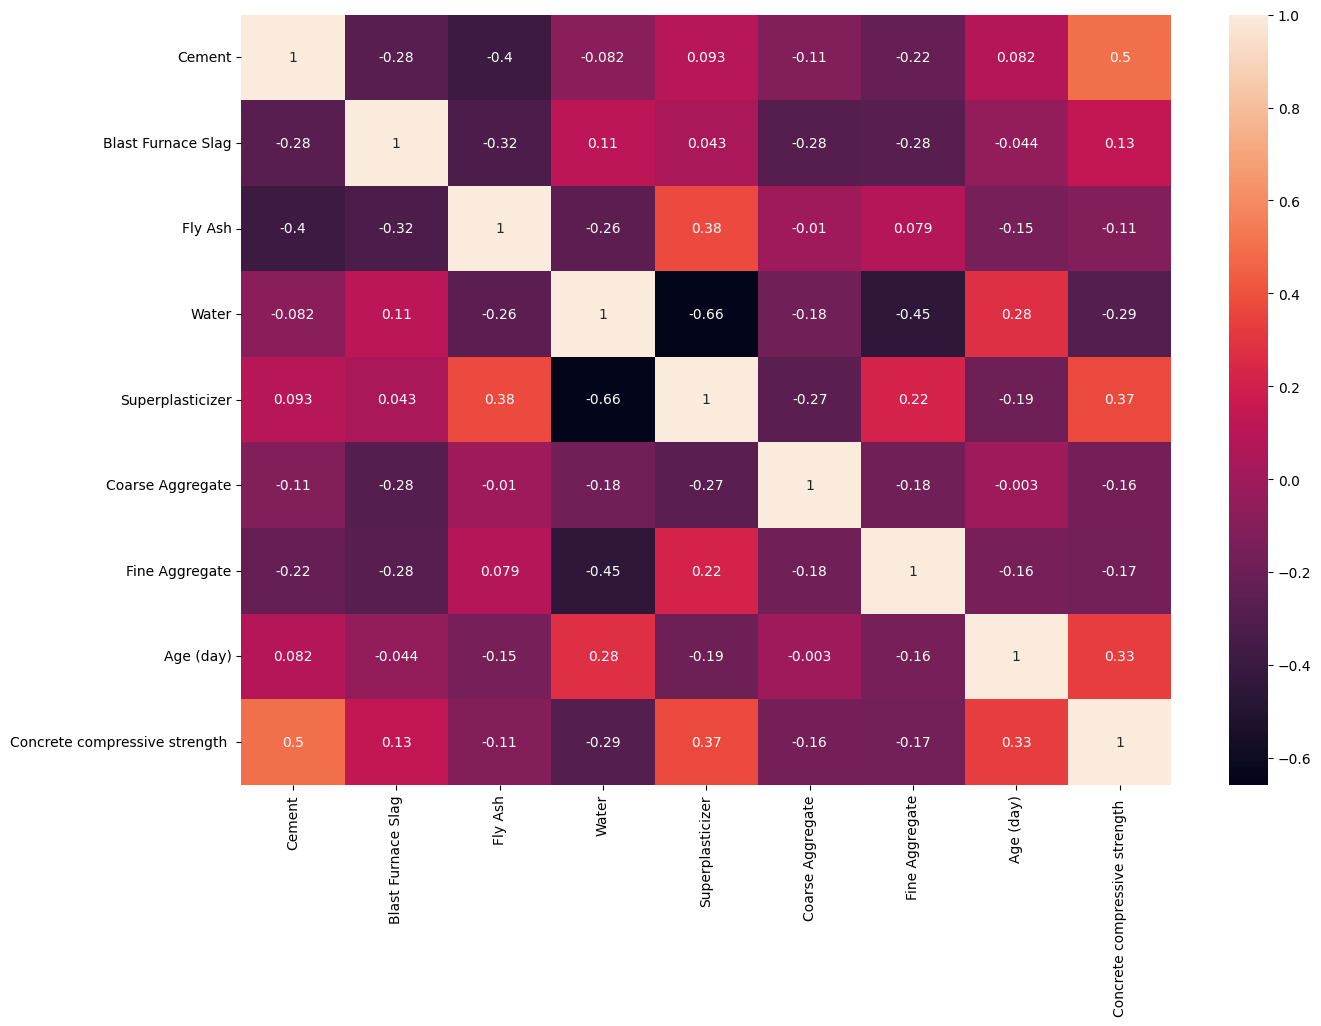

In [7]:
cor = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor, annot=True)
plt.show()

#### **Let's se distribution of target variable**

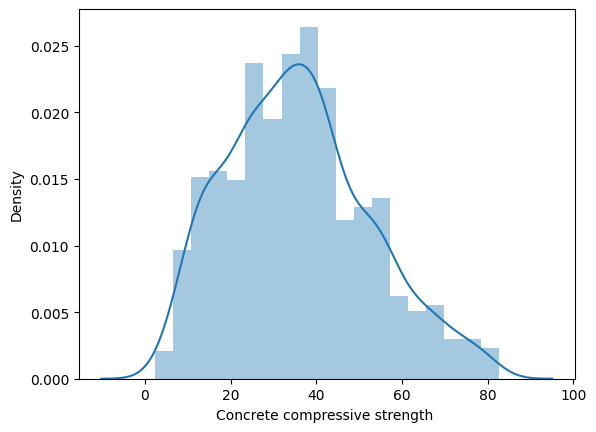

In [8]:
sns.distplot(data['Concrete compressive strength '])
plt.show()

-----

## **3. Classifier Models**

**Logistic Regression**
- Logistic Regression is a simple and interpretable model that serves as a good baseline for classification tasks.

**Decision Tree Classifier**
- Decision Trees can capture non-linear relationships and are easy to interpret.

**Random Forest Classifier**
- Random Forest is an ensemble method that reduces overfitting and improves prediction accuracy by combining multiple decision trees.

#### **Separate features and target variable**

In [9]:
X = data.drop(columns=['Concrete compressive strength '])
y = data['Concrete compressive strength ']

#### **Convert target variable to binary classification for simplicity**

In [10]:
# We'll consider compressive strength above median as high strength
median_strength = y.median()
y = (y > median_strength).astype(int)

#### **Split data into training and testing sets**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Standardize the features**

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### **Using Logistic Regression**

In [13]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

#### **Plot results for Logistic Regression**

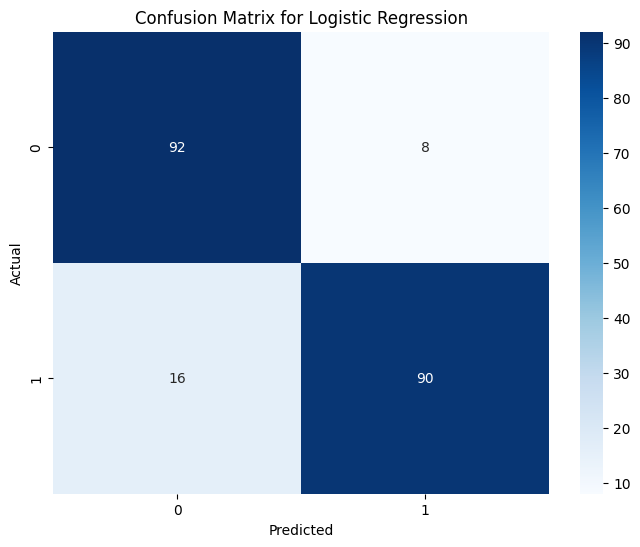

In [14]:
# Confusion Matrix for Logistic Regression
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

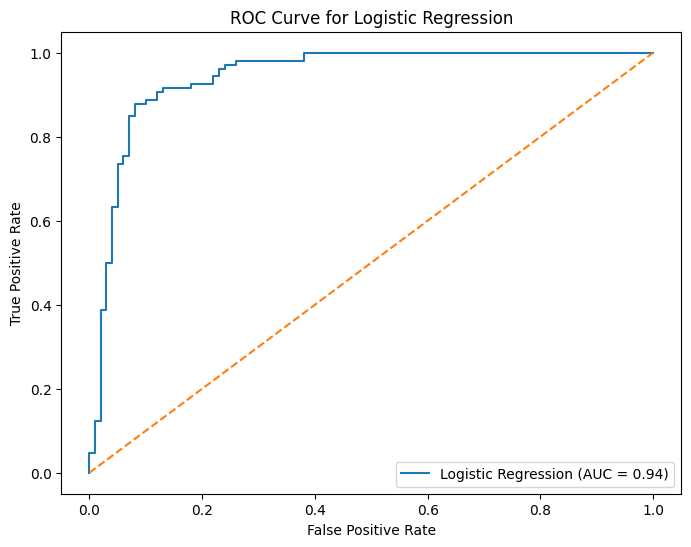

In [15]:
# ROC Curve for Logistic Regression
logreg_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])
fpr, tpr, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {logreg_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()

#### **Logistic Regression Evaluation**

In [26]:
# Classification reports
report_logreg = classification_report(y_test, y_pred_logreg)

# Output results
print("Logistic Regression Accuracy:", accuracy_logreg)
print("\nLogistic Regression Report:\n", report_logreg)

Logistic Regression Accuracy: 0.883495145631068

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88       100
           1       0.92      0.85      0.88       106

    accuracy                           0.88       206
   macro avg       0.89      0.88      0.88       206
weighted avg       0.89      0.88      0.88       206



#### **Using Decision Tree Classifier**

In [16]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

#### **Plot results for Decision Tree**

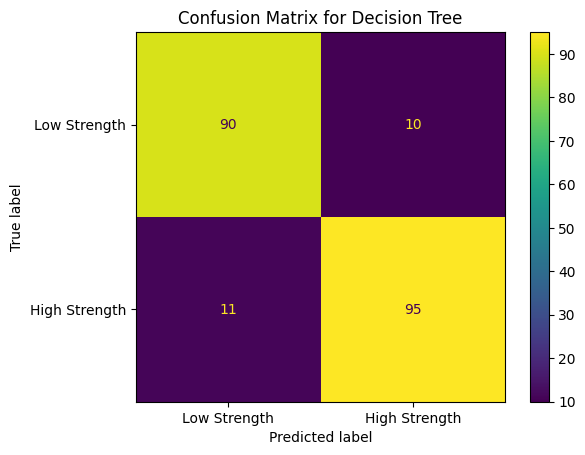

In [19]:
# Confusion Matrix for Decision Tree
cm_tree = confusion_matrix(y_test, y_pred_tree)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=['Low Strength', 'High Strength'])
disp_tree.plot()
plt.title('Confusion Matrix for Decision Tree')
plt.show()

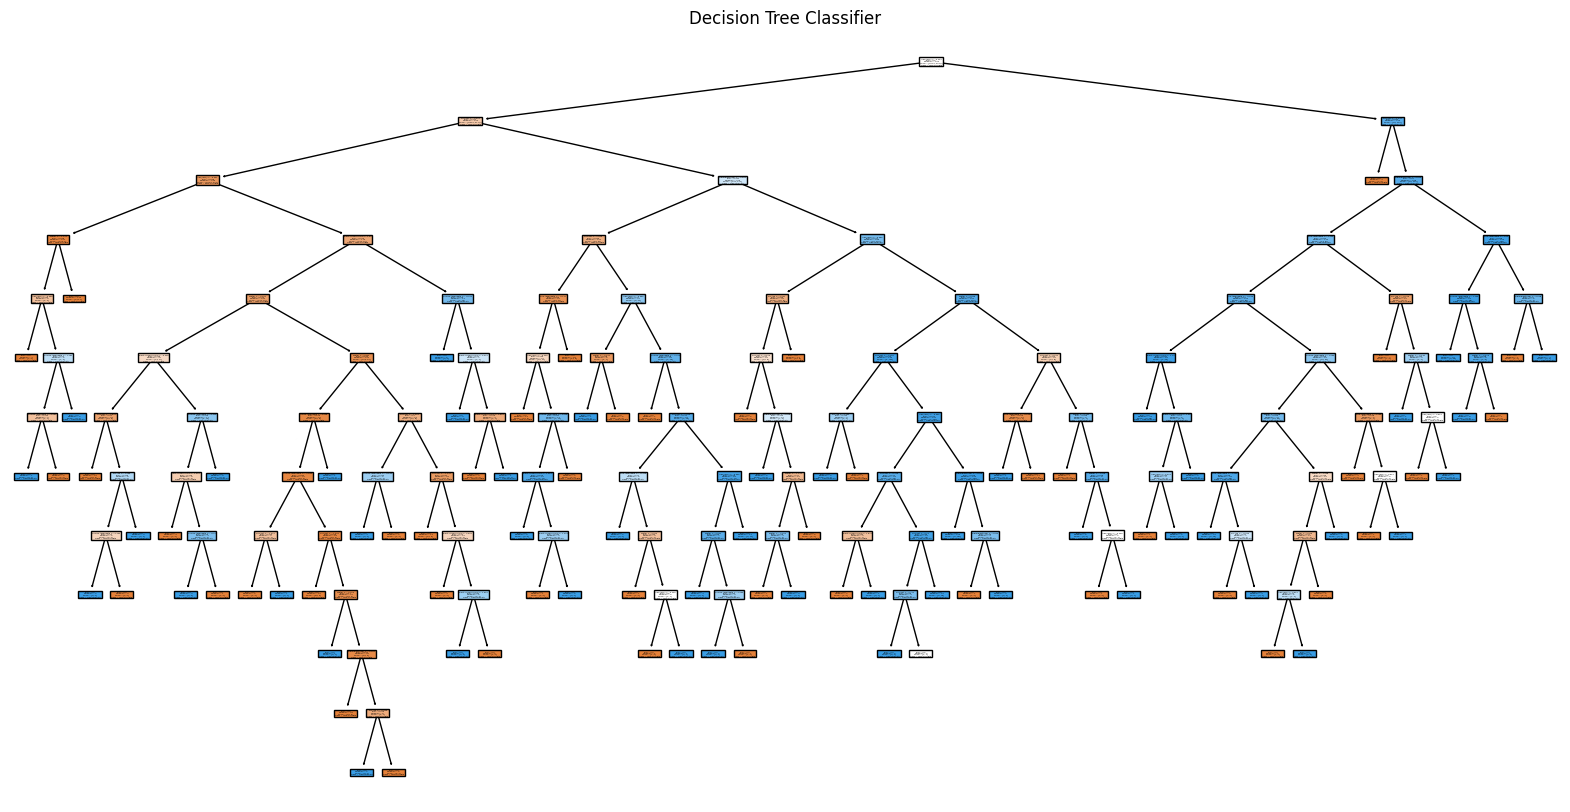

In [20]:
# Save the Decision Tree plot
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=['Low Strength', 'High Strength'])
plt.title('Decision Tree Classifier')
plt.savefig('decision_tree.png')
plt.show()

#### **Decision Tree Evaluation**

In [27]:
report_tree = classification_report(y_test, y_pred_tree)

print("Decision Tree Accuracy:", accuracy_tree)
print("\nDecision Tree Report:\n", report_tree)

Decision Tree Accuracy: 0.8980582524271845

Decision Tree Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       100
           1       0.90      0.90      0.90       106

    accuracy                           0.90       206
   macro avg       0.90      0.90      0.90       206
weighted avg       0.90      0.90      0.90       206



#### **Random Forest Classifier**

In [21]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
accuracy_forest = accuracy_score(y_test, y_pred_forest)

#### **Plotting Random Forest**

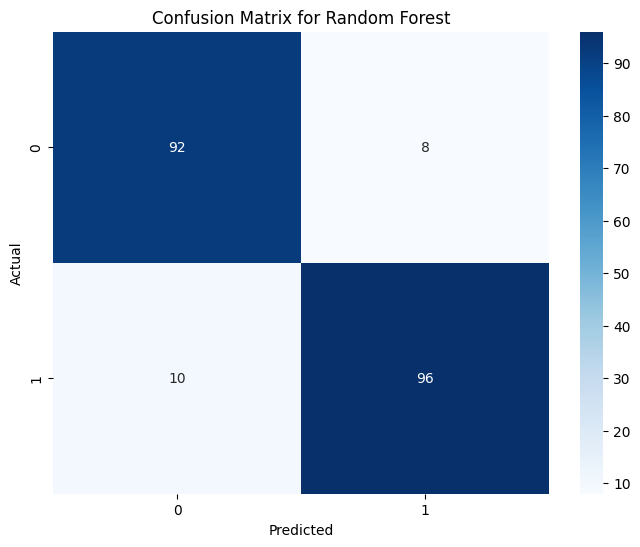

In [22]:
# Confusion Matrix for Random Forest
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_forest, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

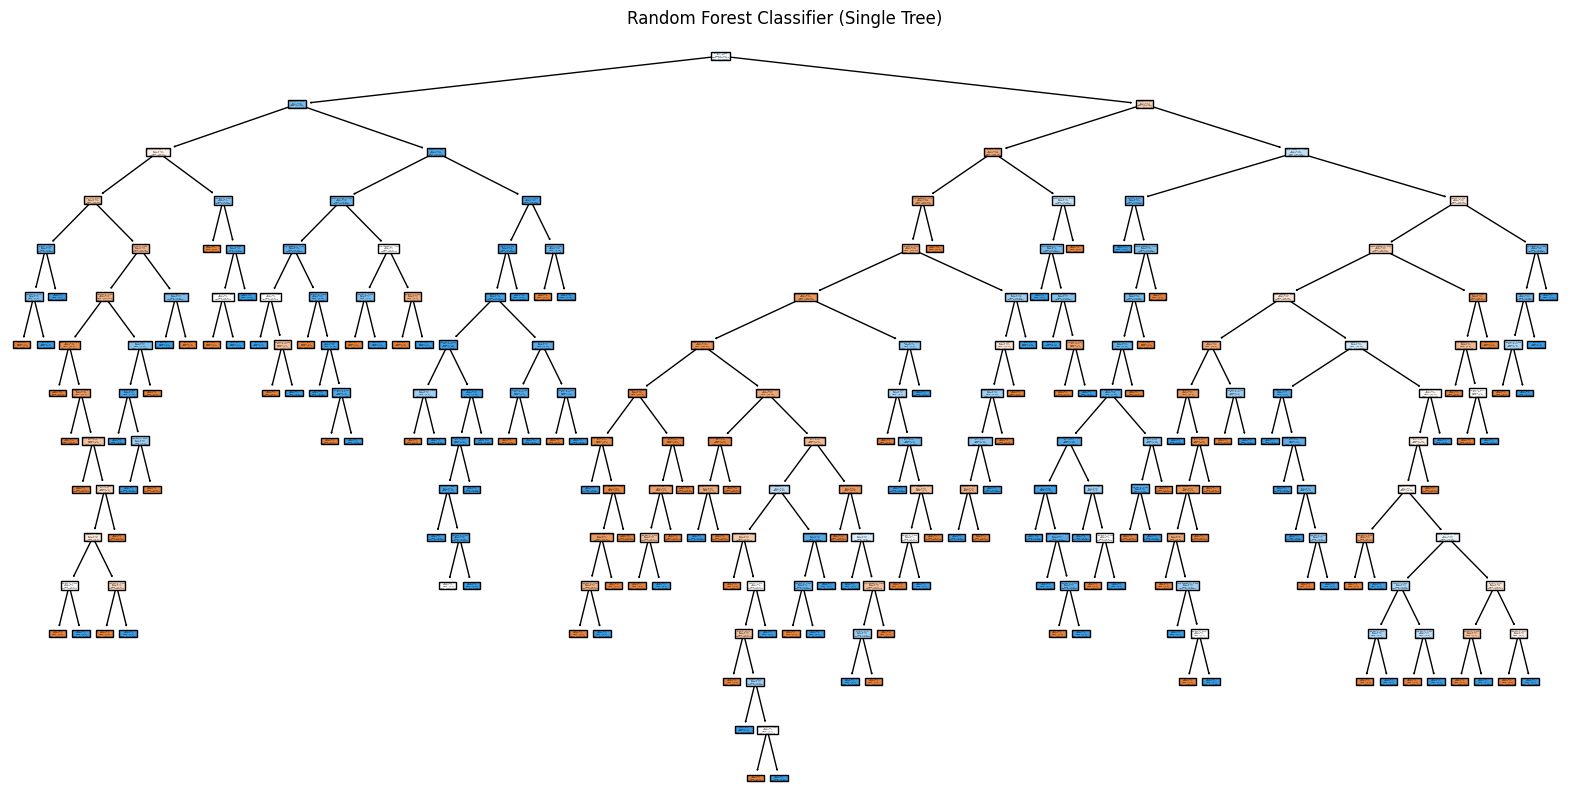

In [23]:
# Save a tree from the Random Forest
plt.figure(figsize=(20,10))
plot_tree(forest.estimators_[0], filled=True, feature_names=X.columns, class_names=['Low Strength', 'High Strength'])
plt.title('Random Forest Classifier (Single Tree)')
plt.savefig('random_forest_tree.png')
plt.show()

#### **Random Forest Evaluation**

In [29]:
report_forest = classification_report(y_test, y_pred_forest)

print("Random Forest Accuracy:", accuracy_forest)
print("\nRandom Forest Report:\n", report_forest)

Random Forest Accuracy: 0.912621359223301

Random Forest Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       100
           1       0.92      0.91      0.91       106

    accuracy                           0.91       206
   macro avg       0.91      0.91      0.91       206
weighted avg       0.91      0.91      0.91       206



#### **Select the best model based on accuracy**

Best Model: Random Forest with accuracy 0.912621359223301

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       100
           1       0.92      0.91      0.91       106

    accuracy                           0.91       206
   macro avg       0.91      0.91      0.91       206
weighted avg       0.91      0.91      0.91       206



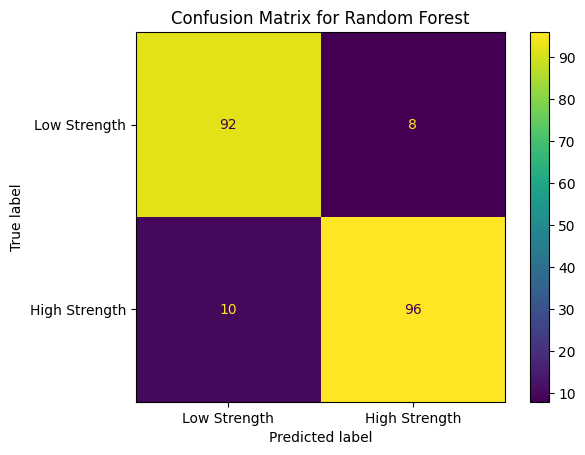

In [30]:
best_model = None
best_model_name = None
best_accuracy = 0

if accuracy_logreg > best_accuracy:
    best_model = logreg
    best_model_name = "Logistic Regression"
    best_accuracy = accuracy_logreg

if accuracy_tree > best_accuracy:
    best_model = tree
    best_model_name = "Decision Tree"
    best_accuracy = accuracy_tree

if accuracy_forest > best_accuracy:
    best_model = forest
    best_model_name = "Random Forest"
    best_accuracy = accuracy_forest

print(f"Best Model: {best_model_name} with accuracy {best_accuracy}")

# Optionally, print the classification report for the best model
y_pred_best = best_model.predict(X_test)
print(f"\nClassification Report for {best_model_name}:\n", classification_report(y_test, y_pred_best))

# Confusion Matrix for the best model
cm_best = confusion_matrix(y_test, y_pred_best)
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=['Low Strength', 'High Strength'])
disp_best.plot()
plt.title(f'Confusion Matrix for {best_model_name}')
plt.show()

## **4. Key Findings**

- The dataset is complete with no missing values.

- The target variable (Concrete compressive strength) varies significantly based on the composition and age of the concrete.
  
- More complex models like Random Forest tend to perform better in capturing the nuances of the data compared to simpler models like Logistic Regression.

## **5. Possible Flaws and Future Work**

- The dataset might have some multicollinearity, which could affect the performance of some models.

- Further feature engineering and selection might improve model performance.

- Additional data, especially with more varied compositions and conditions, could provide better generalization.